In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
ratings = pd.read_csv("Data/title_ratings_cleaned.gz", index_col = False, usecols = ["tconst", "averageRating"])
adultMovies = pd.read_csv("Data/title_basics_for_ratings_analysis.gz", index_col = False, usecols = ["tconst", "isAdult"])

In [3]:
merged = pd.merge(ratings, adultMovies, on = "tconst")
merged = merged.dropna()
merged = merged.reset_index(drop=True)
merged

,tconst,averageRating,isAdult
0,tt0000009,5.9,0
1,tt0000147,5.2,0
2,tt0000335,6.1,0
3,tt0000502,3.8,0
4,tt0000574,6.1,0
...,...,...,...
251334,tt9915790,7.3,0
251335,tt9916132,3.6,0
251336,tt9916160,6.6,0
251337,tt9916428,4.1,0


In [4]:
isAdult = merged[merged.isAdult == 1]
isAdult = isAdult.reset_index(drop=True)

isNotAdult = merged[merged.isAdult == 0]
isNotAdult = isNotAdult.reset_index(drop=True)

In [5]:
isAdult

,tconst,averageRating,isAdult
0,tt0061926,4.9,1
1,tt0062361,5.9,1
2,tt0062417,6.4,1
3,tt0063118,5.4,1
4,tt0063176,4.7,1
...,...,...,...
4095,tt8383792,3.7,1
4096,tt8996466,7.6,1
4097,tt9326956,5.4,1
4098,tt9604724,6.1,1


In [6]:
isNotAdult

,tconst,averageRating,isAdult
0,tt0000009,5.9,0
1,tt0000147,5.2,0
2,tt0000335,6.1,0
3,tt0000502,3.8,0
4,tt0000574,6.1,0
...,...,...,...
247234,tt9915790,7.3,0
247235,tt9916132,3.6,0
247236,tt9916160,6.6,0
247237,tt9916428,4.1,0


In [7]:
print(stats.normaltest(isAdult.averageRating))
print(stats.normaltest(isNotAdult.averageRating))
print(stats.levene(isAdult.averageRating, isNotAdult.averageRating))

NormaltestResult(statistic=37.298910646133066, pvalue=7.95507837376304e-09)
NormaltestResult(statistic=11573.389159404689, pvalue=0.0)
LeveneResult(statistic=16.483259257795833, pvalue=4.909637913798499e-05)


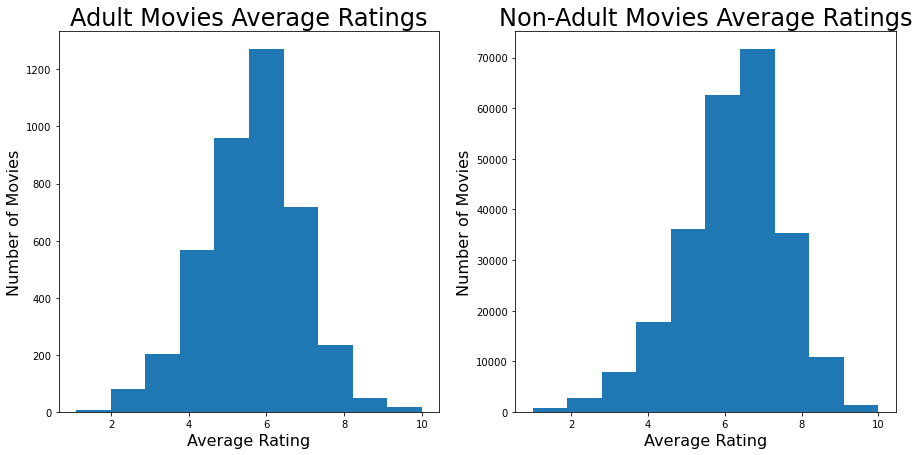

In [8]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1) 
plt.hist(isAdult.averageRating)
plt.title("Adult Movies Average Ratings", fontsize=24)
plt.xlabel("Average Rating", fontsize=16)
plt.ylabel("Number of Movies", fontsize=16)

plt.subplot(1, 2, 2)
plt.hist((isNotAdult["averageRating"]))
plt.title("Non-Adult Movies Average Ratings", fontsize=24)
plt.xlabel("Average Rating", fontsize=16)
plt.ylabel("Number of Movies", fontsize=16)
plt.show()

In [9]:
print(stats.ttest_ind(isAdult.averageRating, isNotAdult.averageRating, equal_var = False))

Ttest_indResult(statistic=-26.6609473492188, pvalue=5.956038702964403e-145)


In [10]:
print(stats.mannwhitneyu(isAdult.averageRating, isNotAdult.averageRating))

MannwhitneyuResult(statistic=379011430.0, pvalue=8.608334019479829e-170)
